In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train_df, test_df])
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


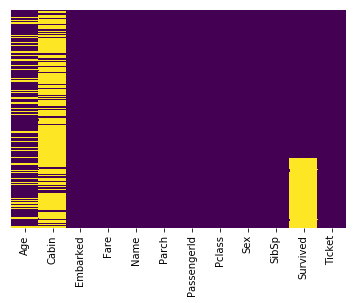

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df['Title']=df.Name.str.extract('([A-Za-z]+)\.')
df['Title'].value_counts()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Jonkheer      1
Mme           1
Sir           1
Countess      1
Lady          1
Don           1
Dona          1
Name: Title, dtype: int64

In [6]:
df[df['Age'].isnull()]['Title'].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Ms          1
Dr          1
Name: Title, dtype: int64

In [7]:
# Age
df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Ms'),'Age']= df.Age[df.Title=="Ms"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Dr'),'Age']= df.Age[df.Title=="Dr"].mean()

In [8]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [9]:
df[['Title','Age']].groupby(by='Title',as_index=False).mean().sort_values('Age',ascending=False)

,Title,Age
0,Capt,70.000000
1,Col,54.000000
17,Sir,49.000000
8,Major,48.500000
7,Lady,48.000000
5,Dr,43.571429
16,Rev,41.250000
3,Don,40.000000
4,Dona,39.000000
6,Jonkheer,38.000000


In [10]:
df['Title'] = df['Title'].replace(['Major','Sir','Capt', 'Col','Dr','Rev','Don','Jonkheer'], 'Officer')
df['Title'] = df['Title'].replace(['Mme','Mlle','Ms', 'Countess','Dona','Lady'], 'Mrs')

In [11]:
df['Title'].value_counts()

Mr         757
Miss       260
Mrs        205
Master      61
Officer     26
Name: Title, dtype: int64

In [12]:
df[['Embarked','Pclass','Fare']].groupby(['Embarked','Pclass'],as_index=False).mean()

,Embarked,Pclass,Fare
0,C,1,106.845330
1,C,2,23.300593
2,C,3,11.021624
3,Q,1,90.000000
4,Q,2,11.735114
5,Q,3,10.390820
6,S,1,72.148094
7,S,2,21.206921
8,S,3,14.435422


In [13]:
df[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [14]:
df['Fare'] = df['Fare'].fillna(14.4)

In [15]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs


In [16]:
df['Embarked'].mode().iloc[0]

'S'

In [17]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [18]:
df['Embarked'] = df['Embarked'].map( {'Q': 0, 'S': 1, 'C': 2} ).astype(int)
df['Sex'] = df['Sex'].map({'female': 1,'male': 0}).astype(int)

In [19]:
df['Title'].value_counts()

Mr         757
Miss       260
Mrs        205
Master      61
Officer     26
Name: Title, dtype: int64

In [20]:
df['Title'] = df['Title'].map( {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master':3, 'Officer':4} )

In [21]:
df= df.drop(['Ticket', 'Cabin','Name'], axis=1)

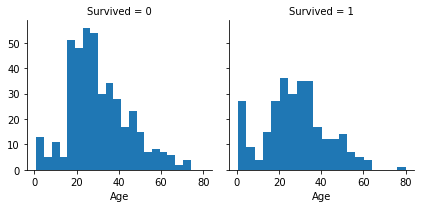

In [22]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [23]:
df.loc[ df['Age'] <= 16, 'AgeBand'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'AgeBand'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'AgeBand'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'AgeBand'] = 3
df.loc[ df['Age'] > 64, 'AgeBand'] = 4

In [24]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeBand
0,22.0,1,7.2500,0,1,3,0,1,0.0,0,1.0
1,38.0,2,71.2833,0,2,1,1,1,1.0,1,2.0
2,26.0,1,7.9250,0,3,3,1,0,1.0,2,1.0
3,35.0,1,53.1000,0,4,1,1,1,1.0,1,2.0
4,35.0,1,8.0500,0,5,3,0,0,0.0,0,2.0


In [25]:
corr_mat = df.corr()
corr_mat['Survived'].sort_values()

Pclass        -0.338481
AgeBand       -0.110922
Age           -0.087092
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.125953
Fare           0.257307
Title          0.398848
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

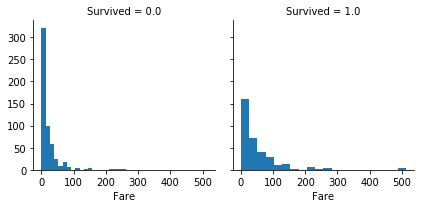

In [26]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [27]:
pd.qcut(df['Fare'], 4).value_counts()

(-0.001, 7.896]      337
(14.454, 31.275]     328
(31.275, 512.329]    323
(7.896, 14.454]      321
Name: Fare, dtype: int64

In [28]:
df.loc[ df['Fare'] <= 7.91, 'Fareband'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fareband'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fareband']   = 2
df.loc[ df['Fare'] > 31, 'Fareband'] = 3

In [29]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeBand,Fareband
0,22.0,1,7.2500,0,1,3,0,1,0.0,0,1.0,0.0
1,38.0,2,71.2833,0,2,1,1,1,1.0,1,2.0,3.0
2,26.0,1,7.9250,0,3,3,1,0,1.0,2,1.0,1.0
3,35.0,1,53.1000,0,4,1,1,1,1.0,1,2.0,3.0
4,35.0,1,8.0500,0,5,3,0,0,0.0,0,2.0,1.0


In [30]:
corr_mat = df.corr()
corr_mat['Survived'].sort_values()

Pclass        -0.338481
AgeBand       -0.110922
Age           -0.087092
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.125953
Fare           0.257307
Fareband       0.295875
Title          0.398848
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

In [31]:
df['isalone'] = df['SibSp'] + df['Parch']
df['isalone']

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      4
8      2
9      1
10     2
11     0
12     0
13     6
14     0
15     0
16     5
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     4
25     6
26     0
27     5
28     0
29     0
      ..
388    0
389    4
390    0
391    1
392    2
393    0
394    4
395    1
396    0
397    2
398    0
399    0
400    0
401    1
402    1
403    0
404    1
405    0
406    1
407    2
408    0
409    2
410    0
411    1
412    0
413    0
414    0
415    0
416    0
417    2
Name: isalone, Length: 1309, dtype: int64

In [32]:
df.loc[ df['isalone'] > 0, 'isalone'] = 1

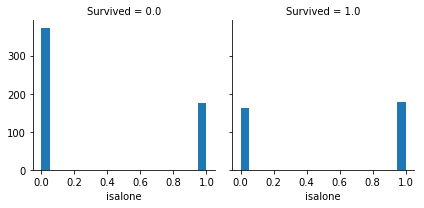

In [33]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'isalone', bins=20)

In [34]:
corr_mat = df.corr()
corr_mat['Survived'].sort_values()

Pclass        -0.338481
AgeBand       -0.110922
Age           -0.087092
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.125953
isalone        0.203367
Fare           0.257307
Fareband       0.295875
Title          0.398848
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Age'] = sc.fit_transform(df['Age'].reshape(-1,1))
df['Fare'] = sc.fit_transform(df['Fare'].reshape(-1,1))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [37]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,AgeBand,Fareband,isalone
0,-0.598759,1,-0.503290,0,1,3,0,1,0.0,0,1.0,0.0,1
1,0.614395,2,0.734744,0,2,1,1,1,1.0,1,2.0,3.0,1
2,-0.295471,1,-0.490240,0,3,3,1,0,1.0,2,1.0,1.0,0
3,0.386928,1,0.383184,0,4,1,1,1,1.0,1,2.0,3.0,1
4,0.386928,1,-0.487823,0,5,3,0,0,0.0,0,2.0,1.0,0


In [38]:
corr_mat = df.corr()
corr_mat['Survived'].sort_values()

Pclass        -0.338481
AgeBand       -0.110922
Age           -0.087092
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Embarked       0.125953
isalone        0.203367
Fare           0.257307
Fareband       0.295875
Title          0.398848
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

In [39]:
df = df.drop(['Age', 'SibSp','Parch'], axis=1)

In [40]:
df.head()

,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,AgeBand,Fareband,isalone
0,1,-0.503290,1,3,0,0.0,0,1.0,0.0,1
1,2,0.734744,2,1,1,1.0,1,2.0,3.0,1
2,1,-0.490240,3,3,1,1.0,2,1.0,1.0,0
3,1,0.383184,4,1,1,1.0,1,2.0,3.0,1
4,1,-0.487823,5,3,0,0.0,0,2.0,1.0,0
